# Organic acid constants implementation

The 'minteq.v4.dat' database includes constants for some organic componds including organic acids.

From there the constants have been copied and included into 'vitens.dat' database.

To include them three edits need to be made. At the beginning and at the main block and in the name table with TA inmpact.
Only if the new compound is added everywhere the prgram will run without error message.
 
 
 
Path for changing the database files:

C:\Users\u301072\AppData\Local\conda\conda\envs\spyder\lib\site-packages\phreeqpython



 

This solution has a pH of: 8.31 and a conductivity of: 82.57 uS/cm
5.597348330459039


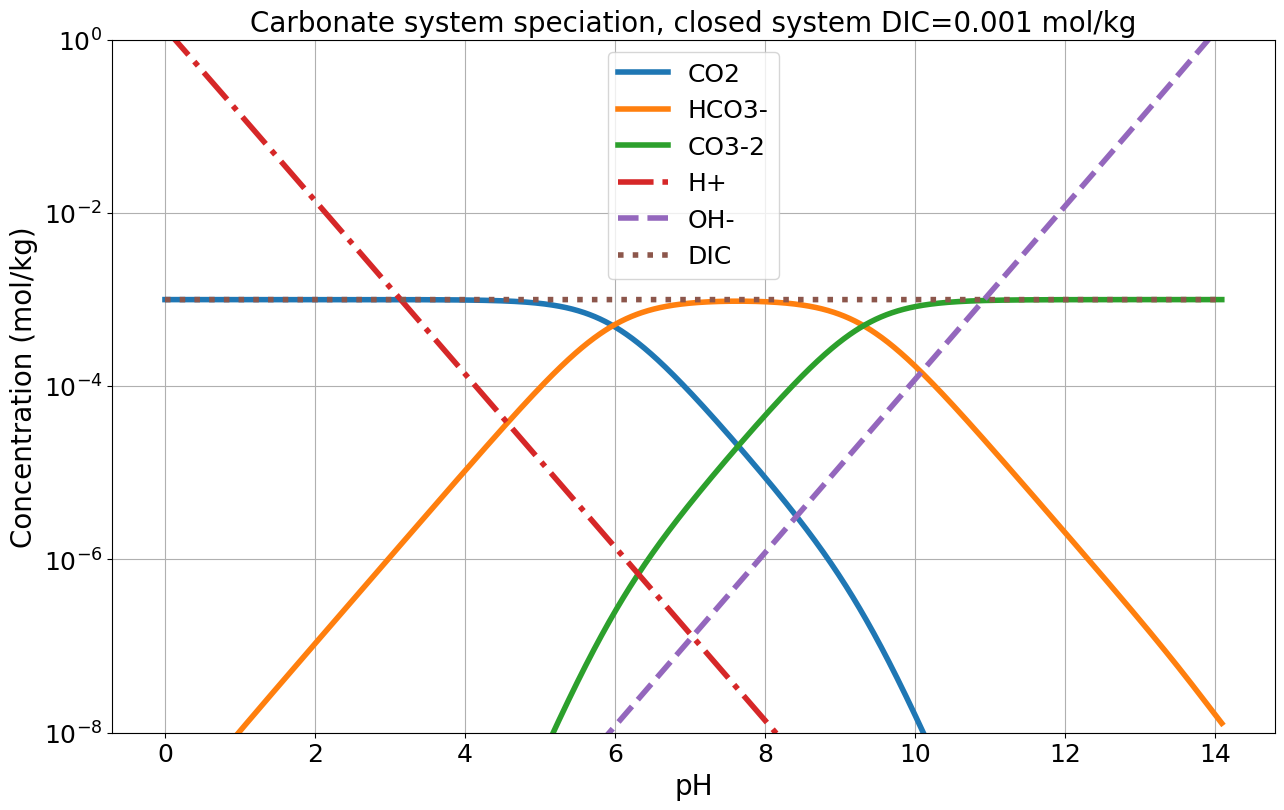

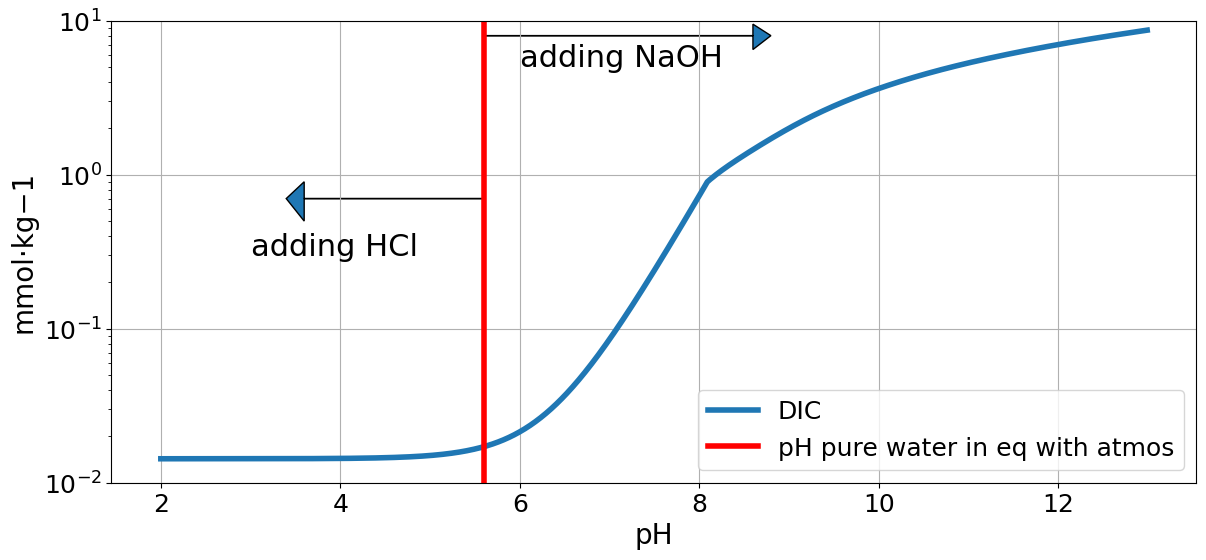

In [1]:

import numpy as np

#package to work with html documents
#import dash_html_components as html


#open system model

import pandas as pd




from matplotlib import pyplot as plt


# set global fontsize stuff


# type plt.rcParams.keys()   to get all settings


# https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

plt.rcParams.update({'font.size': 22,
                     #font.weight':'bold',
                     'xtick.labelsize' : 18,
                     'ytick.labelsize' : 18,
                     'lines.linewidth' :  4,
                     'axes.labelsize'  : 20.0,
                     'axes.titlesize':  20,
                     'figure.titlesize': 'x-large',
                     'legend.fontsize': 18.0,})




#import the package for carbonate system calculation chemistry

from phreeqpython import PhreeqPython



# create new PhreeqPython instance
pp = PhreeqPython(database='vitens.dat')

'''
model the bjerum plot with phreeeqc python

produce a soluion and change pH  (adding NaOH or HCL)   

'''




DIC=0.001

#add some organic acids 


solution=pp.add_solution_simple({'NaHCO3':1},temperature=20) # in Phreeqc default units are mmol/kgw

#relative plots



print("This solution has a pH of: {0:.2f} and a conductivity of: {1:.2f} uS/cm".format(solution.pH,solution.sc))

phs = []
co2 = []
hco3 = []
co3 = []
H= []
OH = []


f=1

#change pH is done by adding strong acid  HCl   or strong base NaOH


for pH in np.arange(0,14.1,0.01):
    # change the solution pH
    solution.change_ph(pH)
    # get and store the ph, CO2, HCO3 and CO3
    phs.append(pH)
    co2.append(solution.total('CO2',units='mol')*f)
    co3.append(solution.total('CO3',units='mol')*f)
    hco3.append(solution.total('HCO3',units='mol')*f)
    H.append(solution.species['H+']) # given in mol/l
    OH.append(solution.species['OH-']) # given in mol/l






dic = [sum(x) for x in zip(co2, hco3, co3)]


fig = plt.figure(figsize=[15,9])
plt.plot(phs,co2,label='CO2')
plt.plot(phs,hco3,label='HCO3-')
plt.plot(phs,co3,label='CO3-2')
plt.plot(phs,H,linestyle='dashdot',label='H+')
plt.plot(phs,OH,linestyle='dashed',label='OH-')
plt.plot(phs,dic,linestyle='dotted', label='DIC')
plt.xlabel("pH")
plt.yscale('log')
plt.ylim([1e-8,1e0])
#plt.xlim([2,12])
plt.ylabel("Concentration (mol/kg)")
plt.title("Carbonate system speciation, closed system DIC={} mol/kg".format(DIC))
lgnd = plt.legend()
ax = plt.gca()
ax.grid(True)
plt.savefig('closed-carbonate-system-speciation.pdf')  





# fig2 = plt.figure(figsize=[14,6])
# plt.plot(lines['pH'],lines['DIC'],label='DIC')
# plt.xlabel("pH")
# plt.yscale('log')
# plt.ylabel('μmol·kg−1')







DIC=[]
pH_value=[]
CO2=[]
HCO3=[]
CO3=[]



# pCO2 in ppm
pCO2=415

#open system  with phreeqc

T=25

#alkalinity in umol
alk=10000

#convert umol/L concentartion in mmol/L  
c=alk*1e-3


#step in negative
step=0.000001
#step=0.00010



a=-np.logspace(4,-8,num=100,base=10)

b=np.logspace(-6,4,num=100,base=10)

long=np.concatenate((a, b), axis=None)




#choose alkalinity and not NaHCO3 concentration as this cant be zero

#positive alkainity
pH_high=np.arange(6,13.01,0.01)

pH_low=np.arange(0,5,0.01)

pH_full=np.arange(2,13,0.01)

# mmol is the input 
#sol=pp.add_solution_simple({'NaHCO3':0.001},temperature=T) # in Phreeqc default units are mmol/kgw

sol=pp.add_solution({'temp':T})

#change the alkalinty in increments
for c in pH_full:
    
    # the pressure default unit is atm so I convert the ppm to atm
    p=pCO2*1e-6
    
    #if pCO2!=0:
     
    #change the pH by adding  HCl or NaOH
    #sol.change_ph(c,'NaOH')
    #sol.change_ph(c,'HCl')
    sol.change_ph(c)
    
    
    #here I have to check what to use for pressure
    CO2_gas=pp.add_gas({'CO2(g)':p}, pressure=p , fixed_pressure=True)
    
    
    
    # reaction with ambient CO2 pressure
    sol.interact(CO2_gas)
    
    
    
    co2=sol.total('CO2',units='mmol')
    hco3=sol.total('HCO3',units='mmol')
    co3=sol.total('CO3',units='mmol')
    
    dic=co2+hco3+co3
    
    
    #write data into two lists for plots later
    DIC.append(dic)
    CO2.append(co2)
    HCO3.append(hco3)
    CO3.append(co3)
    pH_value.append(sol.pH)
    
    # delete the gas
    #sol.forget();CO2_gas.forget()





# for negative alkalinity one needs to add acid from pH=5.6




# the zero alkalinity pH
solution_zero=pp.add_solution({'temp':25})


#here I have to check what to use for pressure
CO2_gas=pp.add_gas({'CO2(g)':p}, pressure=p , fixed_pressure=True)
 
 
# reaction with ambient CO2 pressure
solution_zero.interact(CO2_gas)

# react
zero_pH=solution_zero.pH

print(zero_pH)

'''
DIC pH relationship plot 


Syntax: matplotlib.pyplot.arrow(x, y, dx, dy, **kwargs)
Parameters: 
x, y: The x and y coordinates of the arrow base. 
dx, dy: The length of the arrow along x and y direction. 
**kwargs: Optional arguments that helps in adding properties to arrow, like 
adding color to arrow, changing width of arrow 

'''

fig3 = plt.figure(figsize=[14,6])
plt.plot(pH_value,DIC,label='DIC')
plt.xlabel("pH")
plt.yscale('log')
plt.ylim([1e-2,1e1])
plt.ylabel('mmol·kg−1')

 


# only one line may be specified; full height
plt.axvline(x=zero_pH, color = 'r', label = 'pH pure water in eq with atmos')

plt.arrow(zero_pH, 0.7, -2, 0, head_width=0.4,head_length=0.2)
plt.text(3, 0.3, "adding HCl")
plt.arrow(zero_pH, 8, 3, 0, head_width=3,head_length=0.2)
plt.text(6,5,"adding NaOH")
plt.legend()
ax = plt.gca()
ax.grid(True)
plt.savefig('DIC-pH-relationship.pdf') 



In [2]:
# bjerum plot for citric acid



In [3]:
#use another database with more organics


pp = PhreeqPython(database='minteq.v4_lukas_edit.dat')

c_org_acid=1


acids=['H(Acetate)','H3(Citrate)','H(Formate)','NaHCO3']

sol=pp.add_solution_simple({acids[1]:c_org_acid},temperature=20, units='mmol')


print(sol.pH)


pH_full=np.arange(1,8,0.01)


print(sol.species)


#create empty lists depending on how often the acid can deprotonate



citrate=[]

H_citrate=[]

H2_citrate=[]

H3_citrate=[]

phs=[]

for c in pH_full:
    
    #change pH
    sol.change_ph(c)
    
    #conjugate bases
    citrate.append(sol.total('Citrate-3',units='mmol'))
    H_citrate.append(sol.total('H(Citrate)-2',units='mmol'))
    H2_citrate.append(sol.total('H2(Citrate)-',units='mmol'))
    H3_citrate.append(sol.total('H3(Citrate)',units='mmol'))
    
    phs.append(sol.pH)



3.2407643902341623
{'Citrate-3': 1.4745304445464654e-08, 'H(Citrate)-2': 1.799017548698519e-05, 'H+': 0.0005906365493863671, 'H2': 3.087955197437157e-40, 'H2(Citrate)-': 0.0005545805209585289, 'H2O': 55.50683295973886, 'H3(Citrate)': 0.0004274145590168026, 'O2': 2.1440138721284907e-15, 'OH-': 1.2277941567659601e-11}


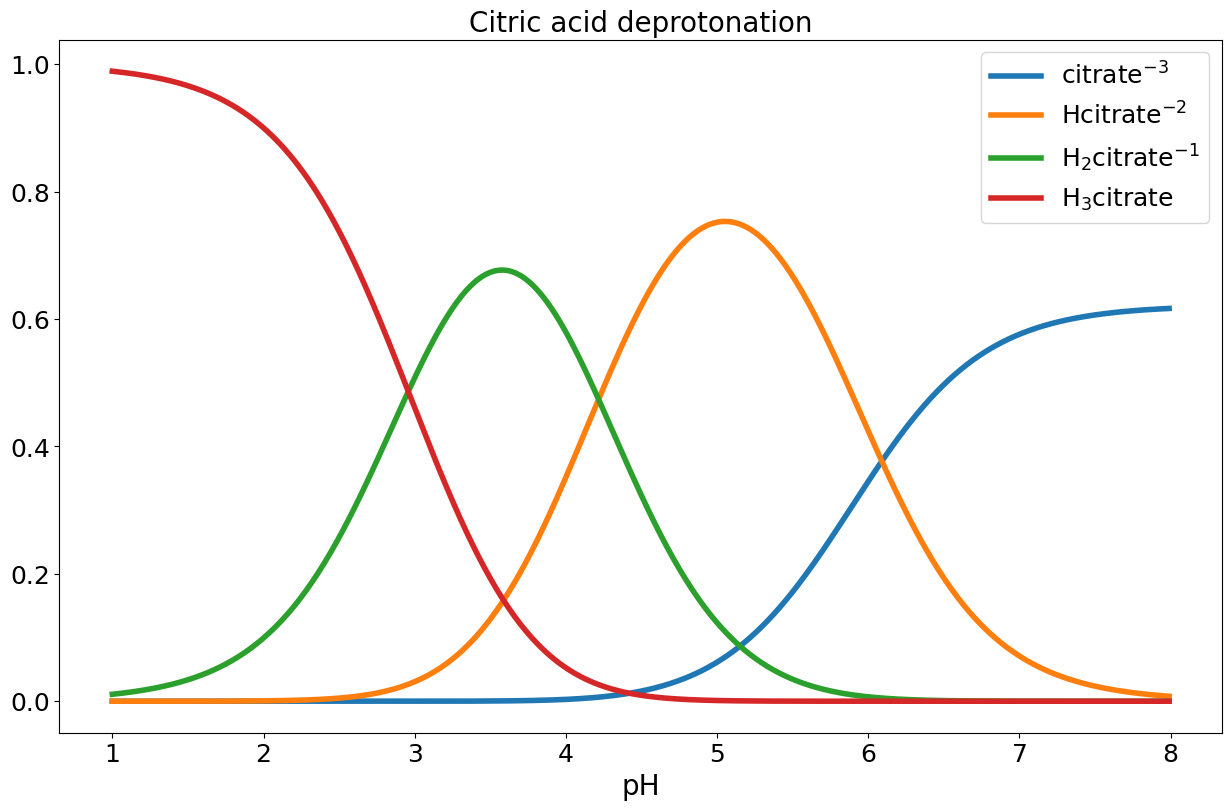

In [4]:
fig = plt.figure(figsize=[15,9])
plt.plot(phs,citrate,label='citrate$^{-3}$')
plt.plot(phs,H_citrate,label='Hcitrate$^{-2}$')
plt.plot(phs,H2_citrate,label='H$_{2}$citrate$^{-1}$')
plt.plot(phs,H3_citrate,label='H$_{3}$citrate')
plt.title('Citric acid deprotonation')
plt.xlabel('pH')
plt.legend()

#titration stop point line


    # change the ph
    def change_ph(self, to_pH, with_chemical=None):
        """ Change the pH of a solution by dosing either HCl and NaOH, or a user supplied acid or base """
        # default to NaOH and HCl
        if not with_chemical:
            if to_pH < self.pH:
                # dose HCl to lower pH
                self.pp.equalize_solution(self.number, "Fix_pH", -to_pH, 10, "HCl")
            else:
                # dose NaOH to raise pH
                self.pp.equalize_solution(self.number, "Fix_pH", -to_pH, 10, "NaOH")
        else:
            self.pp.equalize_solution(self.number, "Fix_pH", -to_pH, 10, with_chemical)
        return self

    

In [5]:
# make plot for acetic acid

#use another database with more organics


pp = PhreeqPython(database='minteq.v4_lukas_edit.dat')

c_org_acid=1


acids=['H(Acetate)','H3(Citrate)','H(Formate)','NaHCO3']

sol=pp.add_solution_simple({acids[0]:c_org_acid},temperature=20, units='mmol')


print(sol.pH)


pH_full=np.arange(1,8,0.01)


print(sol.species)


#create empty lists depending on how often the acid can deprotonate



acetate=[]

H_acetate=[]



phs=[]

for c in pH_full:
    
    #change pH
    sol.change_ph(c)
    
    #conjugate bases
    acetate.append(sol.total('Acetate-',units='mmol'))

    H_acetate.append(sol.total('H(Acetate)',units='mmol'))
    
    phs.append(sol.pH)




3.906944888191644
{'Acetate-': 0.0001254670753871641, 'H(Acetate)': 0.0008745329245945393, 'H+': 0.00012549856142255857, 'H2': 4.571154903388761e-40, 'H2O': 55.50683295969505, 'O2': 9.787449071549241e-16, 'OH-': 5.607495535289142e-11}


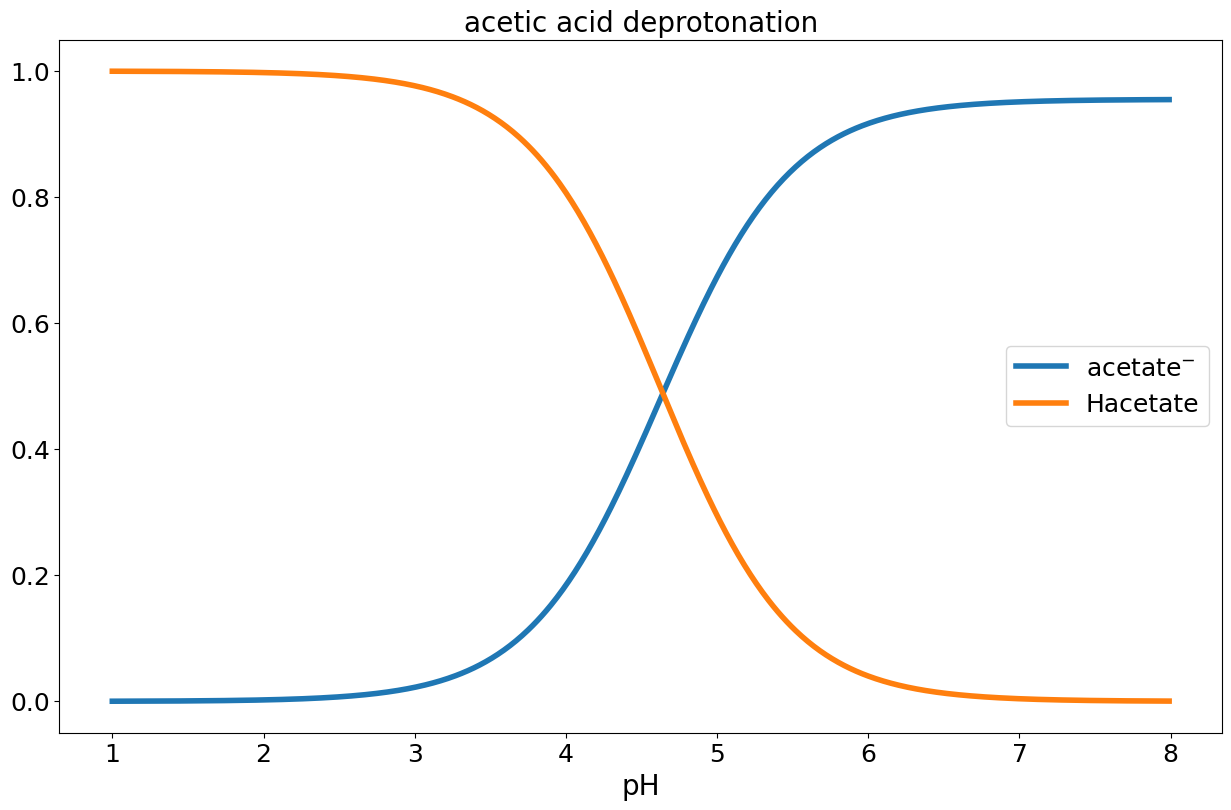

In [6]:
fig = plt.figure(figsize=[15,9])
plt.plot(phs,acetate,label='acetate$^{-}$')
plt.plot(phs,H_acetate,label='Hacetate')

plt.title('acetic acid deprotonation')
plt.xlabel('pH')
plt.legend()

# Create ay mixed Bjerum plot with carbonate species and acetate


8.266268225963051
{'CH4': 0.0, 'CO2': 1.1500039641221199e-05, 'CO3-2': 9.417661281758896e-06, 'H+': 5.604543509890329e-09, 'H2': 4.2078057679750395e-39, 'H2O': 55.50930747168884, 'HCO3-': 0.0009784180134757845, 'Na+': 0.000999335722952586, 'NaCO3-': 1.521968990726754e-07, 'NaHCO3': 5.12088707847931e-07, 'NaOH': 1.801597080835631e-19, 'O2': 2.3526465098325753e-16, 'OH-': 1.9370025199316877e-06}


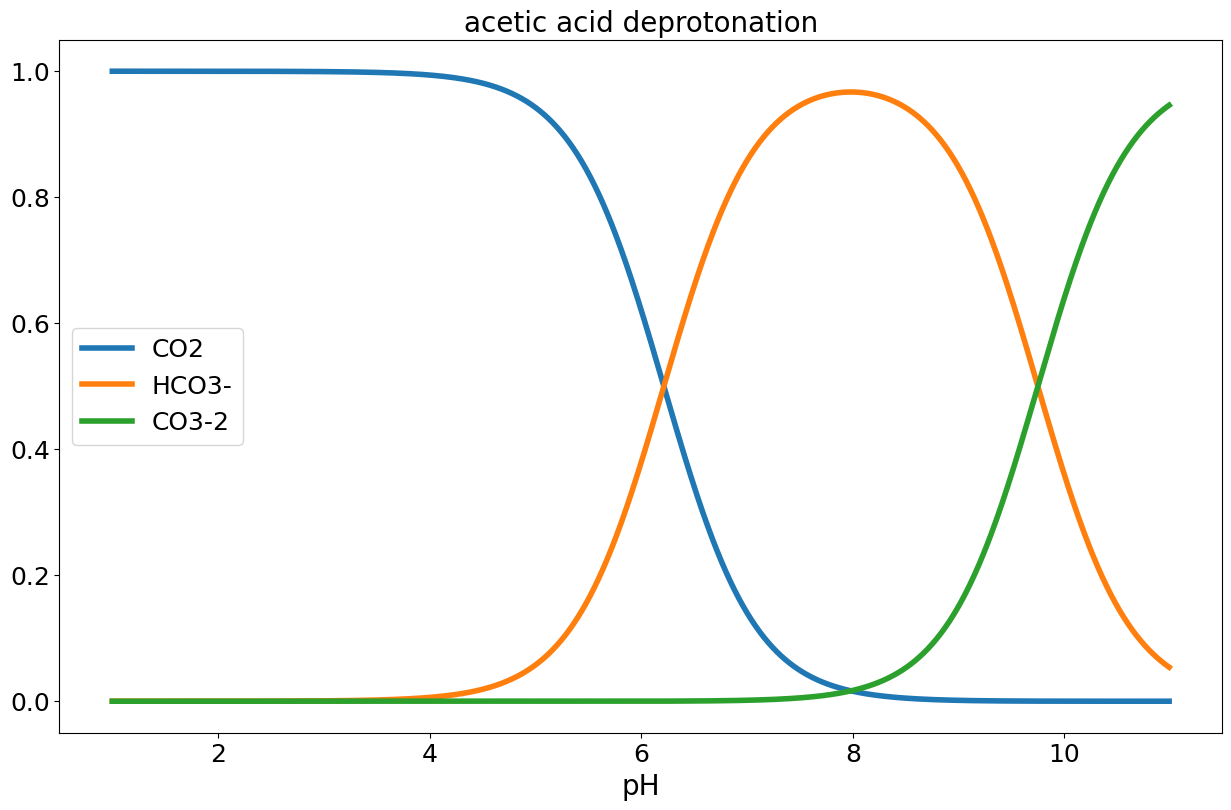

In [7]:
# make plot for acetic acid

#use another database with more organics


pp = PhreeqPython(database='vitens.dat')

#pp = PhreeqPython('https://phreeplot.org/ppihtml/minteq.v4.dat.html')

c_org_acid=1


acids=['H(Acetate)','H3(Citrate)','H(Formate)','NaHCO3']

#use aceteta instead of the acetic acid (to avoid the H+ and HCO3 interaction)

sol=pp.add_solution_simple({'NaHCO3':1.0}) # ,'H(Acetate)':1.0





print(sol.pH)





print(sol.species)


#create empty lists depending on how often the acid can deprotonate



acetate=[]

H_acetate=[]


CO2=[]
HCO3=[]
CO3=[]


phs=[]


# pCO2 in ppm
pCO2=415

pH_full=np.arange(1,11,0.01)

for pH_value in pH_full:
    
    
    #if pCO2!=0:
     
    #change the pH by adding  HCl or NaOH
    #sol.change_ph(c,'NaOH')
    #sol.change_ph(c,'HCl')
    sol.change_ph(pH_value)
    
    # the pressure default unit is atm so I convert the ppm to atm
    #p=pCO2*1e-6

    # the function equilizie needs the phreeqc input the partial pressure in negative log10 scale

    #input_pCO2=np.log10(p)


    # new function from phreeqc package used this time
    # reaction with ambient CO2 pressure
    #sol.equalize(['CO2(g)'], [input_pCO2])
    
    
    #conjugate bases
    acetate.append(sol.total('Acetate-',units='mmol'))

    #H_acetate.append(sol.total('H(Acetate)',units='mmol'))
    
       
    CO2.append(sol.total('CO2'))
    HCO3.append(sol.total('HCO3'))
    CO3.append(sol.total('CO3'))
    
    phs.append(sol.pH)

    
    
fig = plt.figure(figsize=[15,9])
#plt.plot(phs,acetate,label='acetate$^{-}$')
#plt.plot(phs,H_acetate,label='Hacetate')

plt.plot(phs,CO2,label='CO2')
plt.plot(phs,HCO3,label='HCO3-')
plt.plot(phs,CO3,label='CO3-2')

plt.title('acetic acid deprotonation')
plt.xlabel('pH')
plt.legend()   

# Mixed plot

This solution has a pH of: 8.26 and a conductivity of: 140.60 uS/cm


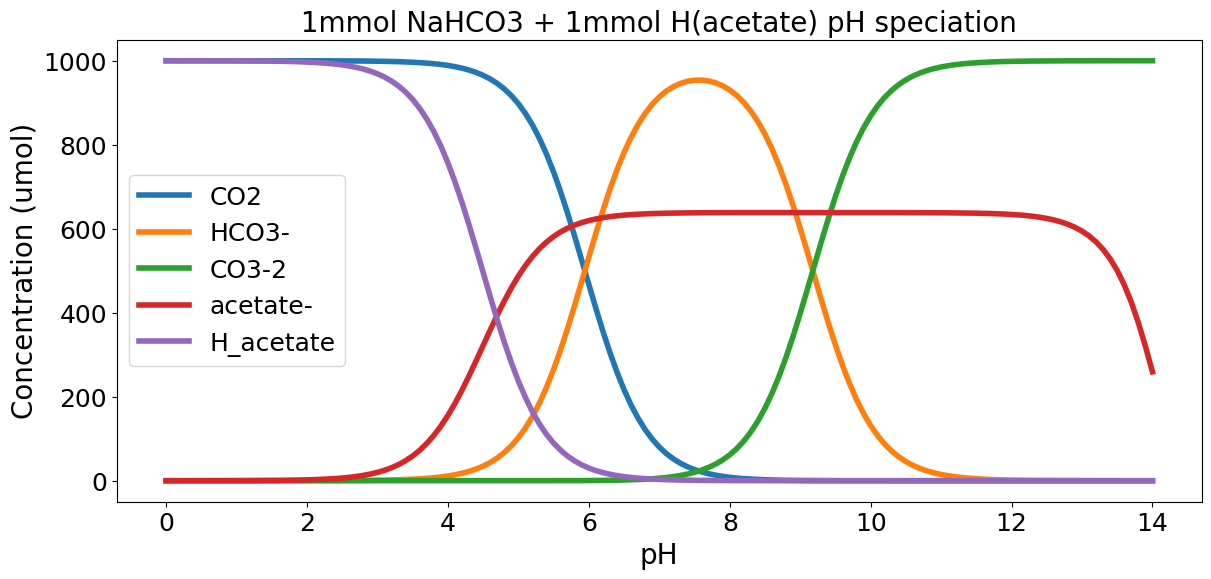

In [8]:
# create new PhreeqPython instance

#I have implemented acetate in the vitens database

# it needs to be added at three locations

pp = PhreeqPython(database='vitens_lukas_edit.dat')

solution = pp.add_solution_simple({'NaHCO3':1.0,'Na(Acetate)':1.0})


print("This solution has a pH of: {0:.2f} and a conductivity of: {1:.2f} uS/cm".format(solution.pH,solution.sc))

# the inorganic compunds
phs = []
co2 = []
hco3 = []
co3 = []


# the organic compounds
acetate=[]

H_acetate=[]


for pH in np.arange(0,14.1,0.1):
    # change the solution pH
    solution.change_ph(pH)
    # get and store the ph, CO2, HCO3 and CO3
    phs.append(pH)
    co2.append(solution.total('CO2')*1000)
    co3.append(solution.total('CO3')*1000)
    hco3.append(solution.total('HCO3')*1000)
    
    #conjugate bases
    acetate.append(solution.total('Acetate-')*1000)

    H_acetate.append(solution.total('H(Acetate)')*1000)
    
    
    
    
    
    

fig = plt.figure(figsize=[14,6])
plt.plot(phs,co2,label='CO2')
plt.plot(phs,hco3,label='HCO3-')
plt.plot(phs,co3,label='CO3-2')

plt.plot(phs,acetate,label='acetate-')

plt.plot(phs,H_acetate,label='H_acetate')

plt.xlabel("pH")
plt.ylabel("Concentration (umol)")
plt.title(" 1mmol NaHCO3 + 1mmol H(acetate) pH speciation ")
lgnd = plt.legend()


In [9]:
solution.species

{'Acetate-': 0.0002592227127337513,
 'CH4': 0.0,
 'CO2': 5.515040966393826e-17,
 'CO3-2': 0.0001572541797293405,
 'Cl-': 1.3627082953480358,
 'H(Acetate)': 2.1043787194383882e-13,
 'H+': 1.4300424441418633e-14,
 'H2': 1.5283888008281792e-40,
 'H2O': 56.87300619136938,
 'HCO3-': 7.437695102152915e-09,
 'Na(Acetate)': 0.0007407773057268137,
 'Na+': 3.202030380517744,
 'NaCO3-': 0.0008427346297593123,
 'NaHCO3': 3.753665354475856e-09,
 'NaOH': 1.374103200677969e-10,
 'O2': 1.7698908833033043e-14,
 'OH-': 1.837905634112833}

In [10]:
solution.phases

{'CH4(g)': -134.08070498671393,
 'CO2(g)': -14.495074170377865,
 'Fix_pH': -14.000000001942366,
 'H2(g)': -36.41268912101752,
 'H2O(g)': -1.5028233204748613,
 'Halite': -1.1995468835131993,
 'O2(g)': -10.55769455079439}

# for changing database files

In [11]:
import phreeqpython

print(phreeqpython.__path__)






['C:\\Users\\u301072\\AppData\\Local\\conda\\conda\\envs\\spyder\\lib\\site-packages\\phreeqpython']


# path

C:\Users\u301072\AppData\Local\conda\conda\envs\spyder\lib\site-packages\phreeqpython

# How much would acetate contribute to the alkalinity titration ?

In [119]:
# define the concentrations of each pH buffering compound in the water sample

c_CA=50 #mmol/kgw

c_acetate=50 # mmol/kgw


temp=20


# set the Sodium moles and produce charge balance for oH-

solution1=pp.add_solution_simple({'NaHCO3':c_CA},temperature=temp, units='mmol')


#concentration CO2
p=415 # ppm

#partial pressure pCO2 in atm
pCO2=p*1e-6 


#phreeqc always uses log10 values
input_pCO2=np.log10(pCO2)
    
    
# equalize solution with CO2
# equilibrium with atmosphere
solution1.equalize(['CO2(g)'], [input_pCO2])


#take just a part of this solution

solution2=pp.add_solution_simple({'Na(Acetate)':c_acetate},temperature=temp, units='mmol')


#acid used for titration
# 1 liter of this solution
# like tiamo 0.02 mol/l

solution_acid=pp.add_solution_simple({'HCl':20},temperature=temp, units='mmol')


#pure water for dilution 
solution_zero = pp.add_solution_simple({},temperature=temp)

# Dilute the solutions

In [120]:
# take a subsmaple and fill up to a target volume

target_volume= 30 #ml

sample_volume= 5#ml 

#the dilution factor
dilution=target_volume/sample_volume


f1=sample_volume/target_volume

f2=(target_volume-sample_volume)/target_volume

# example 50% / 50%

solution1=solution1*f1+solution_zero*f2

solution2=solution2*f1+solution_zero*f2

# Add acid stepwise

In [121]:


# add acid stepwise 

# acid steps (like tiamo )
dx=0.01 #ml


pH_s1=[]

pH_s2=[]

acid_s1=[]

acid_s2=[]

volumes=[]

#starting volume of the titration
v_start=30.0 #ml
v=30.0 #ml

for item in range(4000):
    
    pH_s1.append(solution1.pH)
    
    pH_s2.append(solution2.pH)

    acid_s1.append(item*dx)

    acid_s2.append(item*dx)
    
    volumes.append(v)
    
    #solution1=solution1+dx*solution_acid

    # total volume (phreeqc always 1 liter)
    
    
    #resize the inputs to 1 liter 
    
    #numbers in ml
    total=v+dx
    
    #mixing fractions (they are always constant anyway)
    f1=v/total
    
    f2=dx/total
    
    #mix solutions
    
    solution1=solution1*f1+solution_acid*f2
    
    #solution1.add('HCl',0.1, 'mmol') # add 1 mmol of 
    
    solution2=solution2*f1+solution_acid*f2
    
    #for the next iteration the total becomes the new volume
    v=total
    
    
    
    

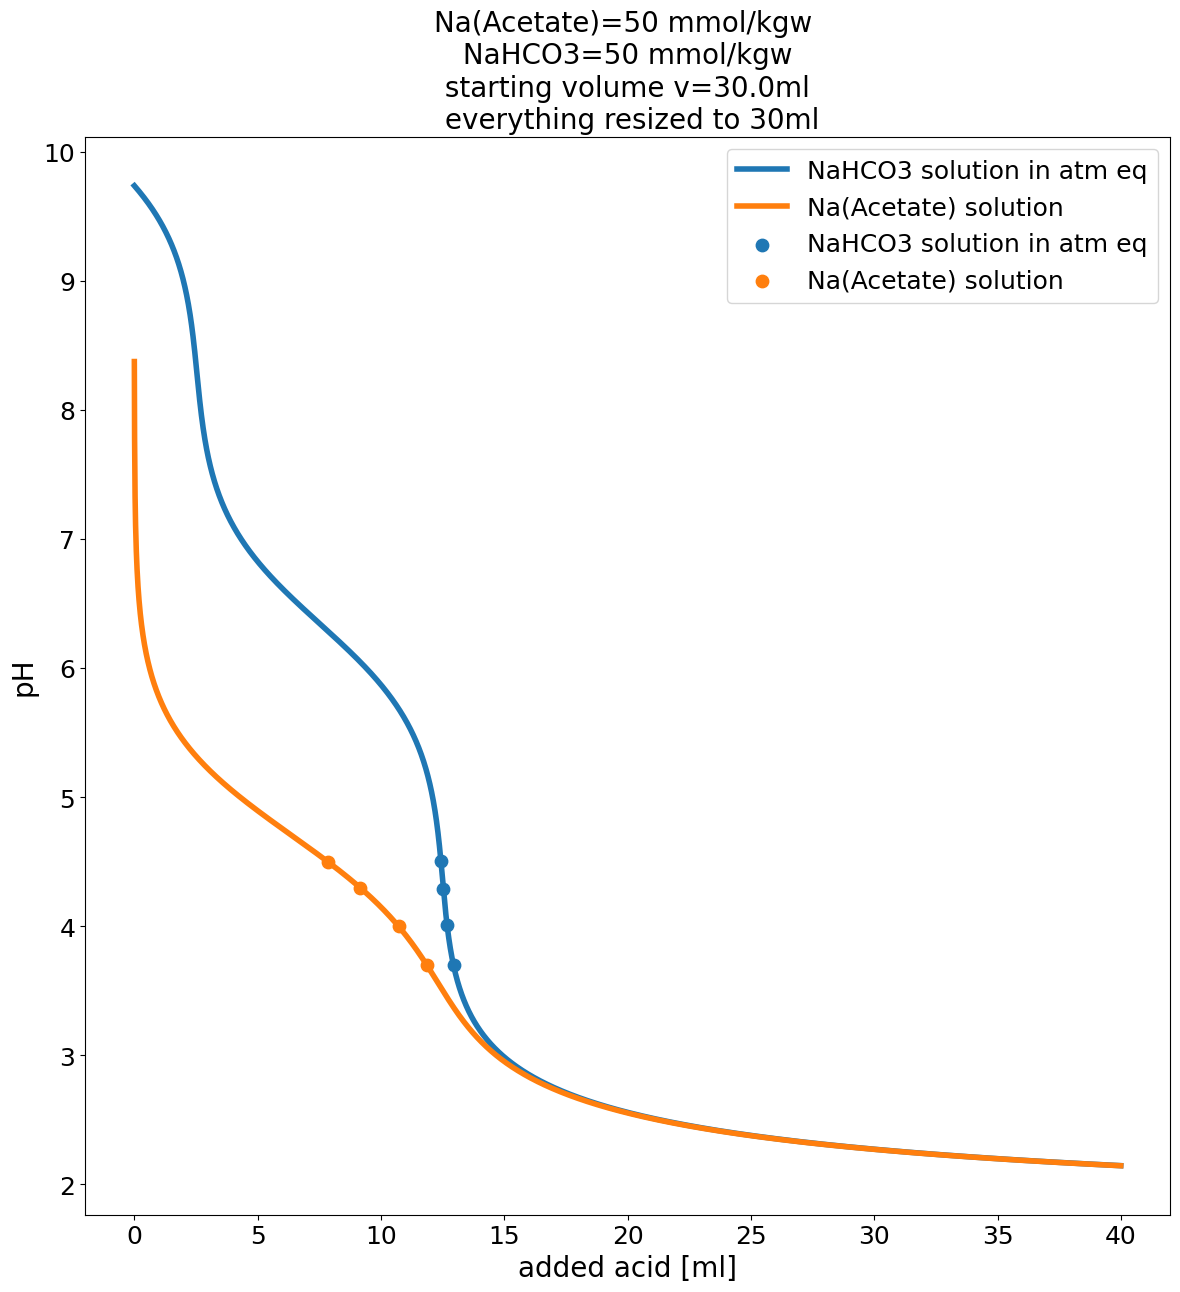

In [122]:
fig = plt.figure(figsize=[14,14])

plt.plot(acid_s1,pH_s1, label='NaHCO3 solution in atm eq')

plt.plot(acid_s2,pH_s2, label='Na(Acetate) solution ')



# plot points used for lin reg of forst

pH_s1_indx=[min(range(len(pH_s1)), key=lambda i: abs(pH_s1[i]-4.5)),
            min(range(len(pH_s1)), key=lambda i: abs(pH_s1[i]-4.3)),
            min(range(len(pH_s1)), key=lambda i: abs(pH_s1[i]-4.0)),
            min(range(len(pH_s1)), key=lambda i: abs(pH_s1[i]-3.7))]
            #min(range(len(pH_s2)), key=lambda i: abs(pH_s2[i]-3.3)),
            #min(range(len(pH_s2)), key=lambda i: abs(pH_s2[i]-3.0))]



pH_s2_indx=[min(range(len(pH_s2)), key=lambda i: abs(pH_s2[i]-4.5)),
            min(range(len(pH_s2)), key=lambda i: abs(pH_s2[i]-4.3)),
            min(range(len(pH_s2)), key=lambda i: abs(pH_s2[i]-4.0)),
            min(range(len(pH_s2)), key=lambda i: abs(pH_s2[i]-3.7))]
            #min(range(len(pH_s2)), key=lambda i: abs(pH_s2[i]-3.3)),
            #min(range(len(pH_s2)), key=lambda i: abs(pH_s2[i]-3.0)),
            #min(range(len(pH_s2)), key=lambda i: abs(pH_s2[i]-2.7))]




plt.scatter([acid_s1[x] for x in pH_s1_indx],[pH_s1[x] for x in pH_s1_indx] , label='NaHCO3 solution in atm eq',s=80)


plt.scatter([acid_s2[x] for x in pH_s2_indx],[pH_s2[x] for x in pH_s2_indx] , label='Na(Acetate) solution ',s=80)





plt.ylabel('pH')

plt.xlabel('added acid [ml]')

plt.legend(loc='upper right')

plt.title('Na(Acetate)={:} mmol/kgw \n NaHCO3={:} mmol/kgw \n starting volume v={:}ml \n everything resized to 30ml'.format(c_CA, c_acetate, v_start))


plt.savefig('titration-plot.pdf')  

# calculate GRAN values


In [123]:
#calculate gran value

gran_s1=[]

gran_s2=[]


for item in range(4000):
    gran_s1.append(10000*((acid_s1[item]+v_start)/v_start)*10**(-pH_s1[item]))
    
    gran_s2.append(10000*((acid_s2[item]+v_start)/v_start)*10**(-pH_s2[item]))

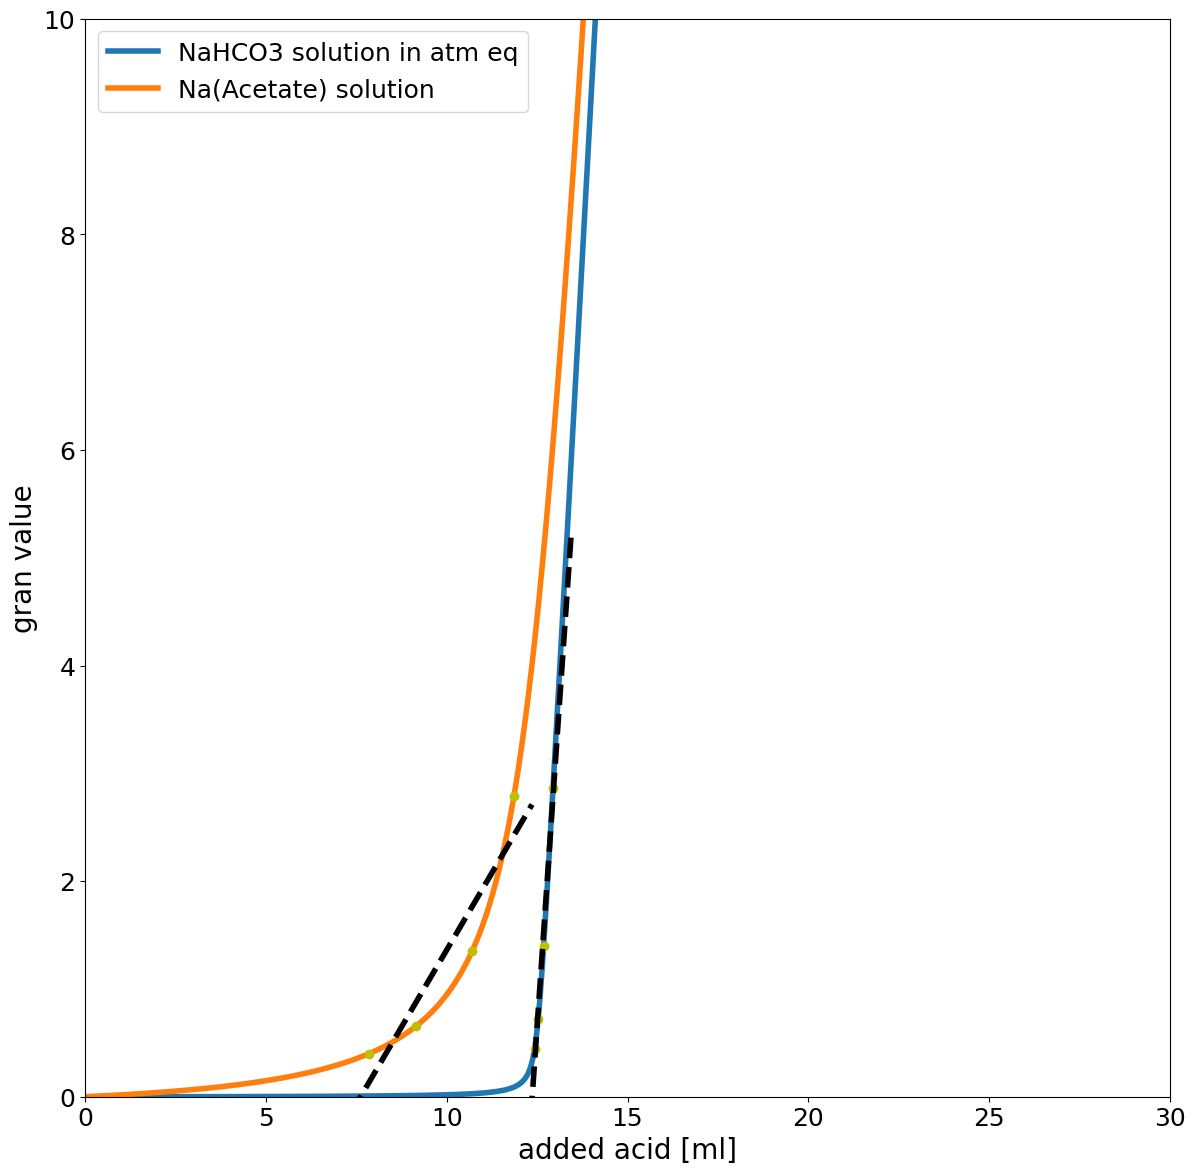

In [124]:
# plot the gran function against acid volume

fig = plt.figure(figsize=[14,14])

plt.plot(acid_s1,gran_s1, label='NaHCO3 solution in atm eq')

plt.plot(acid_s2,gran_s2,label='Na(Acetate) solution ')



plt.ylim([0,10])
plt.xlim([0,30])


plt.xlabel('added acid [ml]')

plt.ylabel('gran value')




#plt.scatter([acid_s1[x] for x in pH_s1_indx] ,[gran_s1[x] for x in pH_s1_indx], label='points NaHCO3 soluition')


#plt.scatter([acid_s2[x] for x in pH_s2_indx] ,[gran_s2[x] for x in pH_s2_indx], label='points Na(acetate) solution')


# linear regression for the points

x=[acid_s1[x] for x in pH_s1_indx]

y=[gran_s1[x] for x in pH_s1_indx]

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

V_1=poly1d_fn.roots

# Extend the regression line
extra_range = 0.5
x_extended = np.array([[x[0] - extra_range], [x[-1] + extra_range]])



plt.plot(x,y, 'yo', x_extended, poly1d_fn(x_extended), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker



x=[acid_s2[x] for x in pH_s2_indx]

y=[gran_s2[x] for x in pH_s2_indx]

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

V_2=poly1d_fn.roots

# Extend the regression line
extra_range = 0.5
x_extended = np.array([[x[0] - extra_range], [x[-1] + extra_range]])


plt.plot(x,y, 'yo', x_extended, poly1d_fn(x_extended), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker



plt.legend(loc='upper left')



In [125]:
# get the index of pH values near to the forst ones

min(enumerate(pH_s1), key=lambda x: abs(x[1]-4.5))

min(enumerate(pH_s1), key=lambda x: abs(x[1]-4.3))

min(enumerate(pH_s1), key=lambda x: abs(x[1]-4.0))

min(enumerate(pH_s1), key=lambda x: abs(x[1]-3.7))


min(range(len(pH_s1)), key=lambda i: abs(pH_s1[i]-3.7))


1294

In [126]:
min(range(len(pH_s1)), key=lambda i: abs(pH_s1[i]-3.7))

1294

In [127]:
pH_s1[min(range(len(pH_s1)), key=lambda i: abs(pH_s1[i]-3.7))]

3.6987804439303513

In [128]:
V_2[0]

7.619302312542265

# calculate the alkalinity

#TA= (0.005L*0.02 mol/L / 0.03 L)*Dilution = 50meq/L



In [129]:

#put everything in mol

def TA(volume_acid,c_acid,dil, volume_start):

    alk=((volume_acid*c_acid)/volume_start)*dil
    

    return alk


print('apparent alkalinity of pure Na(Acetate) solution TA={} ueq/kgw'.format(1e6*TA(V_2[0]/1000,0.02,dilution,0.03)))


print('apparent alkalinity of pure NaHCO3 solution TA={} ueq/kgw'.format(1e6*TA(V_1[0]/1000,0.02,dilution,0.03)))




apparent alkalinity of pure Na(Acetate) solution TA=30477.209250169064 ueq/kgw
apparent alkalinity of pure NaHCO3 solution TA=49458.62565093921 ueq/kgw


# Result

the R2 value of samples with high acetate concentration should be high because the gran function linear regression will not give a smooth line


The highest observed acetate measurement was 180 ppm


In [130]:
# highest acetate alkalinity

(180/59.04)*1000 

3048.7804878048782